Para crear el ambiente: 
```
conda create -n torch-tuto
conda activate torch-tuto
```  
Para instalar PyTorch:
```
conda install pytorch torchvision torchaudio cpuonly -c pytorch
```
Otras librerías para correr este notebook:
```
conda install jupyter ipykernel matplotlib tqdm
```

### Tensores

In [1]:
import torch

In [5]:
torch.zeros(5)
torch.ones(5)
torch.linspace(0, 10, 5)

tensor([ 0.0000,  2.5000,  5.0000,  7.5000, 10.0000])

In [10]:
lista = [1, 2, 3, 4, 5]
torch.Tensor(lista)

tensor([1., 2., 3., 4., 5.])

In [15]:
import numpy as np
numpy_array = np.random.randn(10)
torch_array = torch.from_numpy(numpy_array)
torch_array

tensor([-0.1826, -0.2292,  1.4246, -1.1732, -0.0185, -1.0787,  0.5523, -0.2149,
         0.3687, -0.5535], dtype=torch.float64)

In [18]:
torch_array.numpy()

array([-0.18257655, -0.22915213,  1.42461773, -1.17317587, -0.01852245,
       -1.07873696,  0.55228993, -0.21494004,  0.36873081, -0.55345431])

### Atributos

In [20]:
a = torch.randn(10, 20, 30)
a.ndim, a.shape, a.dtype

(3, torch.Size([10, 20, 30]), torch.float32)

In [23]:
a = torch.linspace(0, 9, 10)
a

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [24]:
b = a.reshape(2, 5)
b

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

In [25]:
b.T

tensor([[0., 5.],
        [1., 6.],
        [2., 7.],
        [3., 8.],
        [4., 9.]])

In [26]:
b.flatten()

tensor([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [27]:
c = b.unsqueeze(1)
c, c.shape

(tensor([[[0., 1., 2., 3., 4.]],
 
         [[5., 6., 7., 8., 9.]]]),
 torch.Size([2, 1, 5]))

In [30]:
c.squeeze()

tensor([[0., 1., 2., 3., 4.],
        [5., 6., 7., 8., 9.]])

### Calculos

In [31]:
data = torch.linspace(0, 5, steps=6)
data

tensor([0., 1., 2., 3., 4., 5.])

In [32]:
data + 5

tensor([ 5.,  6.,  7.,  8.,  9., 10.])

In [33]:
data.pow(2)

tensor([ 0.,  1.,  4.,  9., 16., 25.])

In [34]:
mask = data > 3
data[mask]

tensor([4., 5.])

### Construcción de redes neuronakles

```
y = w*x + b
```

In [44]:
import torch.nn as nn

capa = nn.Linear(3, 2)
capa.weight, capa.bias

(Parameter containing:
 tensor([[ 0.1771,  0.4426, -0.4689],
         [ 0.1046,  0.2171, -0.3273]], requires_grad=True),
 Parameter containing:
 tensor([0.1094, 0.0646], requires_grad=True))

<img src="data/ej1.jpg"  width="1000" height="600">


In [45]:
0.1771 * 1 + 0.4426 * 1 - 0.4689 * 1 + 0.1094

0.26020000000000004

In [47]:
0.1046 * 1 + 0.2171 * 1 - 0.3273 * 1 + 0.0646

0.05900000000000001

In [53]:
salida = capa.forward(torch.Tensor([1, 1, 1]))
salida

tensor([0.2601, 0.0590], grad_fn=<ViewBackward0>)

### Funciones de activacion

$$
\text{ReLU}(x) = \max(0, x)
$$
$$
\text{Sigmoide}(x) = \frac{1}{1 + e^{-x}}
$$

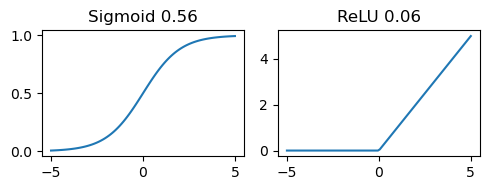

In [59]:
%matplotlib inline
from matplotlib import pyplot as plt

data = torch.linspace(-5, 5, steps=100)
activations = [nn.Sigmoid(), nn.ReLU()]
nombres = ['Sigmoid', 'ReLU']
fig, ax = plt.subplots(1, len(activations), figsize=(5, 2), tight_layout=True)
for activation, ax_,nombre,out in zip(activations, ax, nombres,salida):
    ax_.set_title(nombre + " "+ str(format(activation(out).item(), '.2f')))
    ax_.plot(data, activation(data))

### Funciones de costo y optimizadores

Para entrenar una red neuronal debemos definir

- Una función de costo: Aquello que vamos a minimizar

- Un algoritmo de optimización: De que forma vamos a minimizar

Con las redes neuronales se suelen solucionar 2 tipos de problemas, problemas de regresión y problemas de clasificación.
    
Para problemas de regresión se suele utilizar la función de costo ```MSE (Mean Squared Error)``` y para problemas de clasificación se suele utilizar la función de costo ```CrossEntropyLoss```.

In [64]:
criterion = nn.MSELoss(reduction='mean')
output = torch.randn(5, requires_grad=True)
target = torch.randn(5)
display(output,target)

tensor([-2.1517, -0.4198,  0.6185,  0.8528,  0.0899], requires_grad=True)

tensor([ 1.6861,  0.1425,  0.5247,  0.6918, -0.8938])

In [65]:
loss = criterion(output, target)
loss

tensor(3.2094, grad_fn=<MseLossBackward0>)

In [76]:
import torch.nn.functional as F

criterion = nn.CrossEntropyLoss() #Softmax 
output = torch.randn(5,5, requires_grad=True)
target = torch.empty(5, dtype=torch.long).random_(5)
display(output,target)

tensor([[-1.4901, -0.0658,  0.4889, -0.3192,  1.9208],
        [-0.8216,  1.3500,  0.9491, -0.8048, -1.3373],
        [ 0.1062, -0.0797, -1.2382, -1.3408,  0.7300],
        [-0.8001, -0.6898, -1.6220, -1.0992,  0.5095],
        [ 0.6704,  1.2367, -1.2366, -1.1494, -0.1815]], requires_grad=True)

tensor([2, 0, 4, 0, 0])

In [77]:
loss = criterion(output, target)
loss

tensor(1.7408, grad_fn=<NllLossBackward0>)

Para el algoritmo de optimización se suele utilizar el algoritmo ```SGD (Stochastic Gradient Descent)``` o ```Adam```.

In [127]:
X = torch.tensor([0,10,20,30,40,50,60,70,80,90,100], dtype=torch.float32).unsqueeze(1)
y = torch.tensor([32.0,50.0,68.0,86.0,104.0,122.0,140.0,158.0,176.0,194.0,212.0]).unsqueeze(1)
X

tensor([[  0.],
        [ 10.],
        [ 20.],
        [ 30.],
        [ 40.],
        [ 50.],
        [ 60.],
        [ 70.],
        [ 80.],
        [ 90.],
        [100.]])

In [112]:
y

tensor([[ 32.],
        [ 50.],
        [ 68.],
        [ 86.],
        [104.],
        [122.],
        [140.],
        [158.],
        [176.],
        [194.],
        [212.]])

In [128]:
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

hat_y = model(X)
hat_y

tensor([[ -0.6716],
        [-10.1685],
        [-19.6653],
        [-29.1622],
        [-38.6591],
        [-48.1560],
        [-57.6529],
        [-67.1497],
        [-76.6466],
        [-86.1435],
        [-95.6404]], grad_fn=<AddmmBackward0>)

In [129]:
loss = criterion(hat_y, y)
loss

tensor(36513.8438, grad_fn=<MseLossBackward0>)

In [130]:
model.weight, model.bias

(Parameter containing:
 tensor([[-0.9497]], requires_grad=True),
 Parameter containing:
 tensor([-0.6716], requires_grad=True))

In [131]:
loss.backward() #Calcula los gradientes
optimizer.step() #Actualiza los pesos

In [132]:
model.weight, model.bias

(Parameter containing:
 tensor([[21.5653]], requires_grad=True),
 Parameter containing:
 tensor([-0.3313], requires_grad=True))

In [133]:
model(X)

tensor([[-3.3128e-01],
        [ 2.1532e+02],
        [ 4.3097e+02],
        [ 6.4663e+02],
        [ 8.6228e+02],
        [ 1.0779e+03],
        [ 1.2936e+03],
        [ 1.5092e+03],
        [ 1.7249e+03],
        [ 1.9405e+03],
        [ 2.1562e+03]], grad_fn=<AddmmBackward0>)

In [157]:
import torch
import torch.nn as nn
import torch.optim as optim

X = torch.tensor([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], dtype=torch.float32).unsqueeze(1)
Y = (X * 1.8) + 32

model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)


for nepoch in range(25000):
    hatY = model(X)
    optimizer.zero_grad()
    loss = criterion(hatY, Y)
    loss.backward()
    optimizer.step()
    if nepoch % 1000 == 0:
        print(f'Epoch {nepoch} Loss {loss.item()}')

with torch.no_grad():
    predicted = model(X)
    for i in range(len(X)):
        print(f'Entrada: {X[i].item():.1f}°C, Predicción: {predicted[i].item():.1f}°F, Real: {Y[i].item():.1f}°F')


Epoch 0 Loss 10793.6171875
Epoch 1000 Loss 219.0149383544922
Epoch 2000 Loss 155.28529357910156
Epoch 3000 Loss 91.00506591796875
Epoch 4000 Loss 42.21360778808594
Epoch 5000 Loss 14.015032768249512
Epoch 6000 Loss 2.6938226222991943
Epoch 7000 Loss 0.19836531579494476
Epoch 8000 Loss 0.0027117645367980003
Epoch 9000 Loss 2.067573404929135e-06
Epoch 10000 Loss 4.4135295418357146e-09
Epoch 11000 Loss 1.6420513837545059e-09
Epoch 12000 Loss 5.97951410608033e-10
Epoch 13000 Loss 3.0294441955014406e-10
Epoch 14000 Loss 4.927807814580909e-11
Epoch 15000 Loss 5.556185733723851e-09
Epoch 16000 Loss 9.524889904577449e-11
Epoch 17000 Loss 9.524889904577449e-11
Epoch 18000 Loss 5.461615728563629e-06
Epoch 19000 Loss 0.001725174835883081
Epoch 20000 Loss 2.728312153976731e-07
Epoch 21000 Loss 2.728312153976731e-07
Epoch 22000 Loss 0.0
Epoch 23000 Loss 0.0
Epoch 24000 Loss 0.0
Entrada: 0.0°C, Predicción: 32.0°F, Real: 32.0°F
Entrada: 10.0°C, Predicción: 50.0°F, Real: 50.0°F
Entrada: 20.0°C, Predic

In [158]:
model.weight, model.bias

(Parameter containing:
 tensor([[1.8000]], requires_grad=True),
 Parameter containing:
 tensor([32.], requires_grad=True))

### Entrenamiento por minibatches

In [190]:
import torch.utils.data as data
X = np.random.randn(10000)
y = X*1.8 + 32
class MyDataset(data.Dataset):
    def __init__(self, data: np.ndarray, labels: np.ndarray):
        self.celsius = torch.from_numpy(data.astype('float32')).unsqueeze(1)
        self.fahrenheit = torch.from_numpy(labels.astype('float32')).unsqueeze(1)
        
    def __getitem__(self, idx: int):
        return (self.celsius[idx], self.fahrenheit[idx])
    
    def __len__(self):
        return len(self.fahrenheit)
    
    
dataset = MyDataset(X, y)

dataset[0], len(dataset)

((tensor([-0.2327]), tensor([31.5812])), 10000)

In [191]:
train_set, valid_set, test_set = data.random_split(dataset, [6000, 2000, 2000], 
                                                   generator=torch.Generator().manual_seed(1234))

In [192]:
train_loader = data.DataLoader(train_set, shuffle=True, batch_size=32)
valid_loader = data.DataLoader(valid_set, shuffle=False, batch_size=128)
test_loader = data.DataLoader(test_set, shuffle=False, batch_size=128)

In [193]:
from tqdm import tqdm

num_epochs = 100
model = nn.Linear(1, 1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-2)

running_loss = np.zeros((num_epochs,2))
for i in tqdm(range(num_epochs)):
    train_loss,valid_loss = 0.0,0.0
    for minibatch in train_loader:
        optimizer.zero_grad()
        x_batch,y_batch = minibatch
        hat_y = model(x_batch.unsqueeze(1))
        loss = criterion(hat_y, y_batch)
        loss.backward()
        optimizer.step()
    for minibatch in valid_loader:
        x_batch,y_batch = minibatch
        hat_y = model(x_batch.unsqueeze(1))
        loss = criterion(hat_y, y_batch)
    if i%10 == 0:
        print(f'Epoch {i} Loss {loss.item()}')


  0%|          | 0/100 [00:00<?, ?it/s]c:\Users\llanking\miniconda3\envs\torch-tuto\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([32, 1])) that is different to the input size (torch.Size([32, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\llanking\miniconda3\envs\torch-tuto\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([16, 1])) that is different to the input size (torch.Size([16, 1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
c:\Users\llanking\miniconda3\envs\torch-tuto\Lib\site-packages\torch\nn\modules\loss.py:535: UserWarning: Using a target size (torch.Size([128, 1])) that is different to the input size (torch.Size([128, 1, 1])). T

Epoch 0 Loss 960.1663818359375


 11%|█         | 11/100 [00:02<00:20,  4.32it/s]

Epoch 10 Loss 230.6049041748047


 21%|██        | 21/100 [00:04<00:17,  4.48it/s]

Epoch 20 Loss 23.135757446289062


 32%|███▏      | 32/100 [00:07<00:14,  4.57it/s]

Epoch 30 Loss 4.50108528137207


 42%|████▏     | 42/100 [00:09<00:12,  4.66it/s]

Epoch 40 Loss 4.435572624206543


 51%|█████     | 51/100 [00:11<00:11,  4.41it/s]

Epoch 50 Loss 4.43326473236084


 61%|██████    | 61/100 [00:13<00:08,  4.59it/s]

Epoch 60 Loss 4.436805248260498


 71%|███████   | 71/100 [00:16<00:07,  3.63it/s]

Epoch 70 Loss 4.439022541046143


 81%|████████  | 81/100 [00:18<00:04,  3.95it/s]

Epoch 80 Loss 4.434972763061523


 91%|█████████ | 91/100 [00:21<00:02,  4.32it/s]

Epoch 90 Loss 4.432310104370117


100%|██████████| 100/100 [00:23<00:00,  4.23it/s]


In [194]:
model.weight, model.bias

(Parameter containing:
 tensor([[0.0493]], requires_grad=True),
 Parameter containing:
 tensor([31.9856], requires_grad=True))

: 